In [275]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Gerekli Kütüphanelerin Eklenmesi**

In [276]:
import numpy as nnp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **3. Keşifsel Veri Analizi Yapılması**

In [277]:
# csv dosyasını pandas datarame olarak kaydetme
df = pd.read_csv("/content/drive/MyDrive/Medical_Cost_Personal/insurance.csv")

In [278]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [279]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [280]:
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [281]:
pd.get_dummies(df.region, prefix='region')

,region_0,region_1,region_2,region_3
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [282]:
df.sex=pd.get_dummies(df.sex,drop_first=True)
df.smoker=pd.get_dummies(df.smoker,drop_first=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### **3.1 Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz**

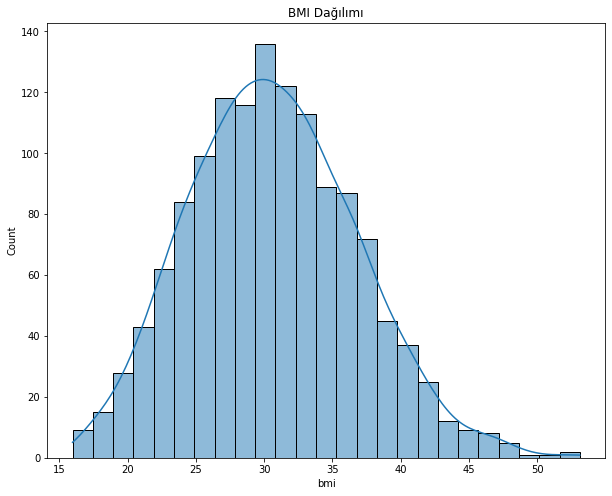

In [283]:
#BMI değerleri incelenerek dağılımı görselleştirildi.
plt.figure(figsize = (10,8))
sns.histplot(x = 'bmi', data = df, kde = True)
plt.title('BMI Dağılımı')
plt.show()

### **3.2 "smoker" ile "charges" arasındaki ilişkiyi inceleyiniz**

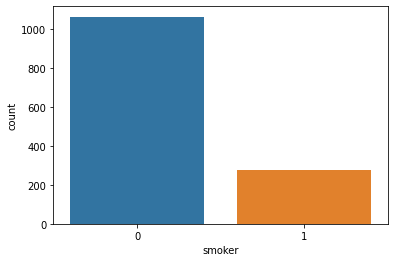

In [284]:
sns.countplot(x='smoker',data=df)

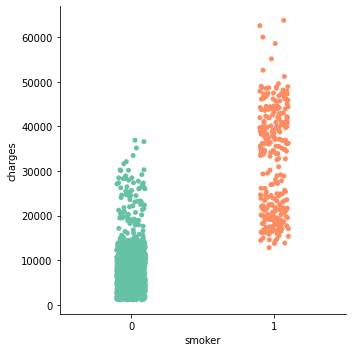

In [285]:
sns.catplot(x = "smoker", y = "charges", palette = "Set2", data = df)

In [286]:
smoker_charges_corr = df[['smoker','charges']].corr()

In [287]:
smoker_charges_corr

,smoker,charges
smoker,1.000000,0.787251
charges,0.787251,1.000000


Text(0.5, 1.0, 'Smoker ve Charges arasındaki ilişki')

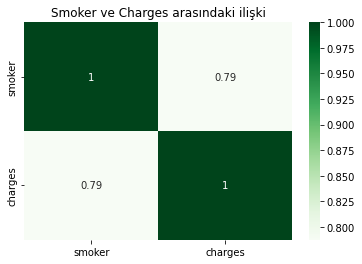

In [288]:
sns.heatmap(smoker_charges_corr,annot=True,cmap='Greens')
plt.title('Smoker ve Charges arasındaki ilişki')

“smoker” ile “charges” arasındaki ilişki corelasyon matrisi ile incelendi.
2 değişken arasında korelasyon yüksektir.

### **3.3 "smoker" (Sigara tüketen) ile "region"(Bölge) arasındaki ilişkiyi inceleyiniz.**

In [289]:
smoker_region_corr = df[['smoker','region']].corr()
smoker_region_corr

,smoker,region
smoker,1.000000,-0.002181
region,-0.002181,1.000000


Text(0.5, 1.0, 'Smoker ve Region arasındaki ilişki')

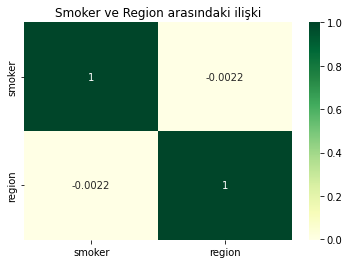

In [290]:
sns.heatmap(smoker_region_corr,annot=True,cmap='YlGn')
plt.title('Smoker ve Region arasındaki ilişki')

### **3.4 “bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.**

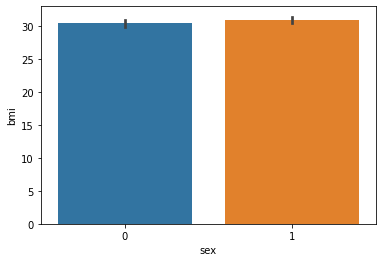

In [291]:
sns.barplot(x = 'sex',
            y = 'bmi',
            data = df)
plt.show()

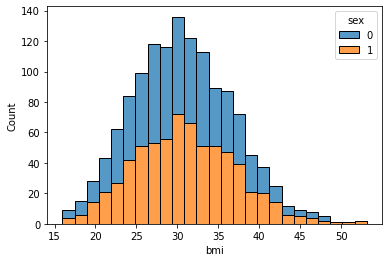

In [292]:
sns.histplot(data=df, x="bmi", hue="sex", multiple="stack")
plt.show()

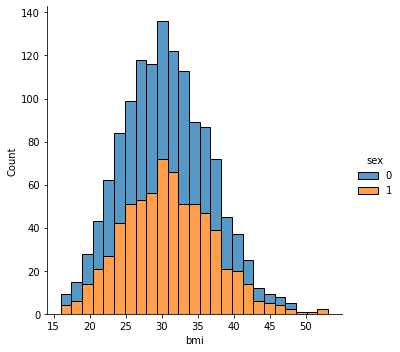

In [293]:
sns.displot(data=df, x="bmi", hue="sex", multiple="stack")
plt.show()

İki cinsiyet de normal dağılımda, kadınların BMI'ı erkeklerden daha yüksek

### **3.5 En çok “children”’a sahip “region”’ı bulunuz.**

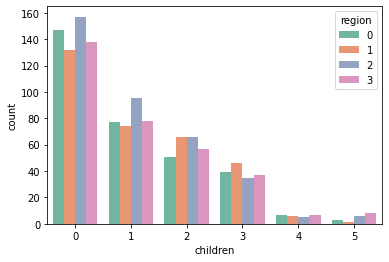

In [294]:
sns.countplot(x ='children', hue = "region", data = df, palette="Set2")
plt.show()

In [295]:
kid_count = df.groupby("region")["children"].sum().sort_values(ascending=False)
kid_count

region
2    382
1    373
3    371
0    339
Name: children, dtype: int64

En çok çocuğu olan bölge Southeast

In [296]:
type(kid_count)

pandas.core.series.Series

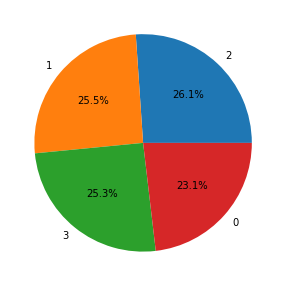

In [297]:
labels=kid_count.index
sizes=kid_count.values
plt.figure(figsize=(12,5))
#colors=sns.color_palette('pastel')
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()

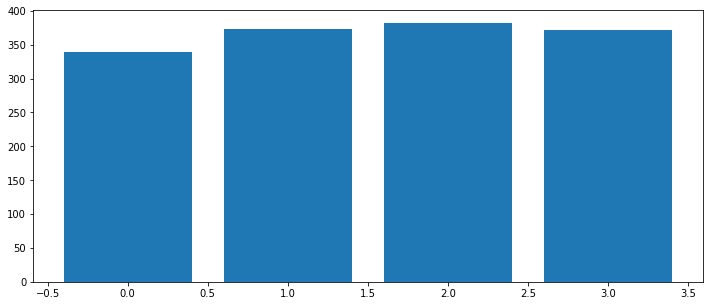

In [298]:
labels=kid_count.index
sizes=kid_count.values
plt.figure(figsize=(12,5))
plt.bar(labels,sizes)
plt.show()

### **3.6 “Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.**

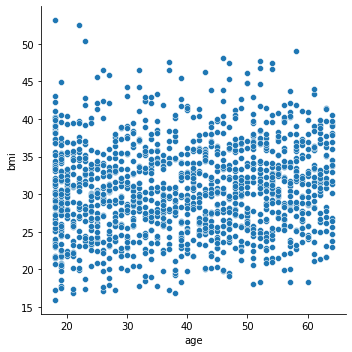

In [299]:
sns.relplot(x='age', y = 'bmi' , data = df)

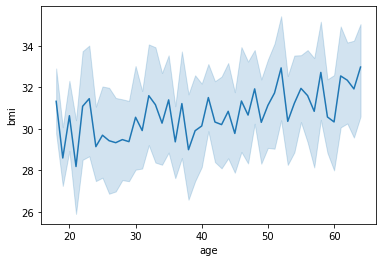

In [300]:
sns.lineplot(x="age", y="bmi",data=df) 

In [301]:
age_bmi_corr = df[['age','bmi']].corr()
age_bmi_corr 

,age,bmi
age,1.000000,0.109272
bmi,0.109272,1.000000


Text(0.5, 1.0, 'Age ile bmi arasındaki ilişki')

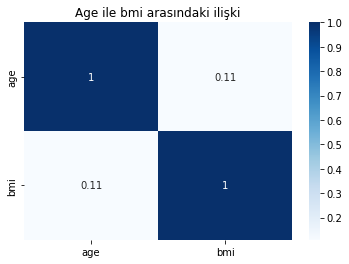

In [302]:
sns.heatmap(age_bmi_corr,annot=True,cmap='Blues')
plt.title('Age ile bmi arasındaki ilişki')

### **3.7 “bmi” ile “children” arasındaki ilişkiyi inceleyiniz.**

In [303]:
df.groupby(["children"])["bmi"].describe()

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,30.550296,6.039106,15.960,26.14375,30.3025,34.74625,53.13
1,324.0,30.623148,6.101435,16.815,26.61500,30.0150,34.23750,52.58
2,240.0,30.978104,6.509644,16.815,25.78625,31.6400,35.35750,48.07
3,157.0,30.684331,5.787173,18.905,27.26500,30.4950,34.32000,46.53
4,25.0,31.391200,4.627211,24.415,28.21500,29.6400,33.66000,41.47
5,18.0,29.605000,7.139686,18.300,24.30250,28.5500,33.05500,46.75


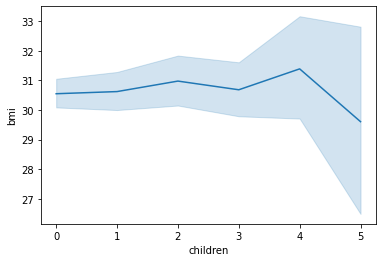

In [304]:
sns.lineplot(x = "children", y = "bmi", data=df)

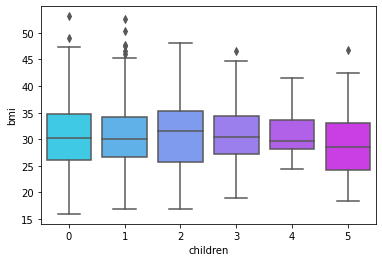

In [305]:
sns.boxplot(x=df['children'], y=df['bmi'], palette="cool")

### -> Grafiği incelendiğinde outlier değerler olduğu tespit edilmiştir.

In [306]:
children_bmi_corr = df[['children','bmi']].corr()
children_bmi_corr 

,children,bmi
children,1.000000,0.012759
bmi,0.012759,1.000000


Text(0.5, 1.0, 'Bmi ile children arasındaki ilişki')

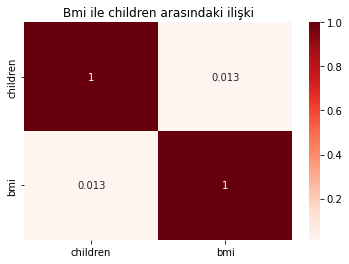

In [307]:
sns.heatmap(children_bmi_corr,annot=True,cmap='Reds')
plt.title('Bmi ile children arasındaki ilişki')

### **3.8 bmi” değişkeninde outlier var mıdır? İnceleyiniz**

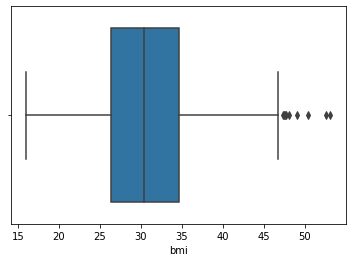

In [308]:
sns.boxplot(data=df, x="bmi")

In [309]:
df_bmi = df['bmi']
Q1 = df_bmi.quantile(0.25)
print(f"Q1: {Q1}")
Q3 = df_bmi.quantile(0.75)
print(f"Q3: {Q1}")
IQR = Q3 - Q1
print(f"IQR: {Q1}")
lower_threshold = Q1 - 1.5*IQR
print(f"lower_threshold: {lower_threshold}")
upper_threshold = Q3 + 1.5*IQR
print(f"upper_threshold: {upper_threshold}")

Q1: 26.29625
Q3: 26.29625
IQR: 26.29625
lower_threshold: 13.7
upper_threshold: 47.290000000000006


In [310]:
#BMI özelliğinin sadece üst kısmında 9 aykırı değer vardır.
upper_outliers_count = df.query(f'bmi > {upper_threshold}')["bmi"].count()
print(f"Upper_outliers_count: {upper_outliers_count}")
lower_outliers_count = df.query(f'bmi < {lower_threshold}')["bmi"].count()
print(f"Lower_outliers_count: {lower_outliers_count}")

Upper_outliers_count: 9
Lower_outliers_count: 0


In [311]:
#Aykırı değerler modeli bozar o yüzden çıkarılması gerekmektedir.

df_bmi = df['bmi']
upper_outliers = df[df_bmi > upper_threshold]
upper_outliers["bmi"] = upper_threshold
upper_outliers

,age,sex,bmi,children,smoker,region,charges
116,58,1,47.29,0,0,2,11381.32540
286,46,0,47.29,2,0,0,9432.92530
401,47,1,47.29,1,0,2,8083.91980
543,54,0,47.29,0,1,2,63770.42801
847,23,1,47.29,1,0,2,2438.05520
860,37,0,47.29,2,1,3,46113.51100
1047,22,1,47.29,1,1,2,44501.39820
1088,52,1,47.29,1,0,2,9748.91060
1317,18,1,47.29,0,0,2,1163.46270


In [312]:
non_outliers = df[~(df["bmi"] > upper_threshold)]
new_df = pd.concat([non_outliers, upper_outliers])
new_df.reset_index(inplace=True)
new_df.drop(columns = ['index'], inplace=True)

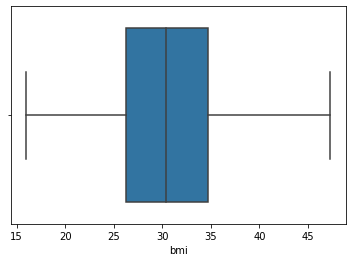

In [313]:
#Aykırı değerleir çıkardıktan sonra görsel
sns.boxplot(data=new_df, x="bmi")

### **3.9“bmi” ile “charges” arasındaki ilişkiyi inceleyiniz**

In [314]:
#Kolerasyon
correlation=df.corr()
correlation

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


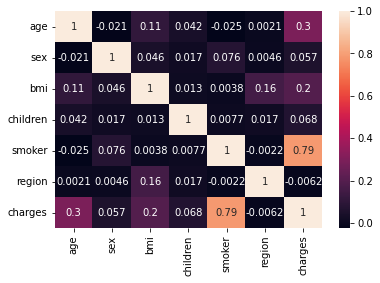

In [315]:
#Kolerasyon matrisi incelendiğinde  “bmi” ile “charges” arasında zayıf (0.2) bir ilişki vardır.

Corr_Heatmap=sns.heatmap(correlation,annot=True)

### **3.10 “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.**

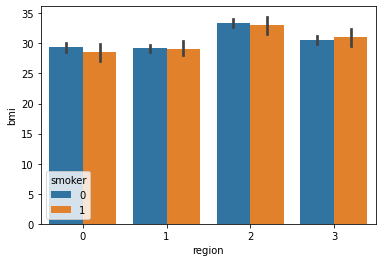

In [316]:
sns.barplot(data=new_df, x="region", y="bmi", hue="smoker")

Text(0.5, 1.0, 'Missing values heatmap')

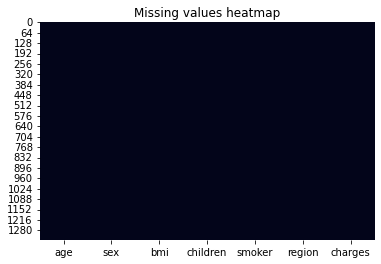

In [317]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

# **4. Veri Ön İşleme Yapılması**



Bu kısımda elinizde olan veriyi model eğitmek için hazır hale getirildi.

● Kategorik değişkenleri düzenlemek için Label ve One-Hot Encoding teknikleri yukarıda kullanıldı

In [318]:
new_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,23,1,47.290,1,0,2,2438.05520
1334,37,0,47.290,2,1,3,46113.51100
1335,22,1,47.290,1,1,2,44501.39820
1336,52,1,47.290,1,0,2,9748.91060


In [319]:
from sklearn.model_selection import train_test_split

# Splitting dependent (y: "charges") and independent (X: other features) variables 
# Bağımlı (y: "charges") ve bağımsız (X: diğer özellikler)  değişkenlerini bölme
X = new_df.drop(["charges"], axis=1)
y = new_df["charges"]

# X ve y'yi eğitim ve teste bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [320]:
# Bölünmüş verileri kontrol etme
print(X_train.ndim, X_test.ndim, y_train.ndim, y_test.ndim)
print("")
print(type(X_train),type(X_test),type(y_train),type(y_test))

2 2 1 1

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [321]:
# Pandas Serisini DataFrame'e Dönüştürme
y_train = y_train.to_frame()
y_test = y_test.to_frame()

## Veriyi Ölçeklendirme

In [322]:
# Scaling data for better modelling performance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in [X_train, X_test, y_train, y_test]:
  scaler.fit_transform(i)
  print(scaler.mean_)

[39.06303419  0.48717949 30.65816774  1.13034188  0.20299145  1.53418803]
[39.54228856  0.54726368 30.63109453  1.01243781  0.20895522  1.47263682]
[13151.32657135]
[13547.71970144]


# **5. Model Seçme**

In [323]:
# Eğitilen ve Karşılaştırılan Modeller
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Performans Metrikleri
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [324]:
# İlgili sınıf isimleriyle modeller oluşturma
linear_regression_model = LinearRegression()

knn_model = KNeighborsRegressor(n_neighbors=7)

tree_model = DecisionTreeRegressor(max_depth = 3)

random_forest_model = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada_model = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gradient_boosting_model = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

xgb_model = XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2, objective = "reg:squarederror")

In [325]:
regressors = [('Linear Regression', linear_regression_model), 
              ('k Nearest Neighbours', knn_model),
              ('Decision Tree', tree_model),
              ('Random Forest', random_forest_model),
              ('AdaBoost', ada_model),
              ('Gradient Boosting Regressor', gradient_boosting_model), 
              ('XGBoost', xgb_model)]

In [326]:
# Instantiate the regression model
r2_scores = []

for regressor_name, model in regressors:
    
    # checking model accuracy 
    scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5, scoring="r2")
    r2_scores.append(scores.mean()*100)

    print("{} r2 Score:".format(regressor_name),str(round(sum(scores)/5*100,3))+"%\n")

Linear Regression r2 Score: 74.564%

k Nearest Neighbours r2 Score: 10.751%

Decision Tree r2 Score: 85.296%

Random Forest r2 Score: 85.979%

AdaBoost r2 Score: 85.484%

Gradient Boosting Regressor r2 Score: 85.716%

XGBoost r2 Score: 85.73%



En iyi model değerler yakın olsa da random forest ve XGBoost gibi duruyor. En kötü sonuç sınıflandırma ve regresyon problemlerinde kullanılan k Nearest Neighbours vermiştir.

# **6. Hiper-parametre Optimizasyonu**

In [327]:
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()
parameters = {
              'eta': [.03, .07, 0.1], #(eta or shrinkage)
              "min_child_weight": [.1, .5, 1],
              "max_depth" : [4, 5, 6, 7]}

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 5,
                        n_jobs = -1
                        )
xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

[19:54:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.85265757441723
{'eta': 0.03, 'max_depth': 4, 'min_child_weight': 0.1}


# **7. Modeli Değerlendirme**

In [328]:
# RMSE, RMAE and r2_score hesaplanması
    
# Model doğruluğunu kontrol etme
rmse = cross_val_score( XGBRegressor(learning_rate=0.03, max_depth = 4, min_child_weight = 0.1), X_train, y_train ,cv=5, scoring = "neg_mean_squared_error")
print("Mean Squared Error of XGBoost:", (rmse, 3))

rmae = cross_val_score( XGBRegressor(learning_rate=0.07, max_depth = 4, min_child_weight = 0.1), X_train, y_train ,cv=5, scoring = "neg_mean_absolute_error")
print("Mean Absolute Error of XGBoost:", (rmae, 3))

r2 = cross_val_score( XGBRegressor(learning_rate=0.07, max_depth = 4, min_child_weight = 0.1), X_train, y_train ,cv=5, scoring = "r2").mean() # Generally used to determine how good is the model. 
print("r2 Score of XGBoost:",str(round(r2*100,4))+"%\n")

[19:54:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error of XGBoost: (array([-22016194.61999084, -19254192.78918585, -25980458.00198055,
       -17596871.38951009, -17249437.7530871 ]), 3)
[19:54:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now d